<h1> Sparse Pseudospectral Approximations </h1>

This notebook replicates part of Figure 5 from Constantine's 2012 CMAME paper [1], "Sparse Pseudospectral Approximation Method". This paper demonstrates how sparse grids should be used to compute coefficients for polynomial approximations by evaluating the model on a sparse grid as opposed to a full tensor grid. 

In [1]:
%matplotlib inline
from effective_quadratures.parameter import Parameter
from effective_quadratures.polynomial import Polynomial
from effective_quadratures.indexset import IndexSet
from effective_quadratures.plotting import coeffplot2D
import numpy as np

Our goal is to approximate the following function
$$f(x_1, x_2) = \frac{1}{2 + 16(x_1 - 0.1)^2 + 25(x_2 + 0.1)^2 },$$

where $x_1$ and $x_2$ are bounded in the hypercube $[-1,1]^2$. As before our first step is to declare the function

In [2]:
def function(x):
    return 1.0/(2.0 + 16*(x[0] - 0.1)**2 + 25*(x[1] + 0.1)**2 )

We will first aim to approximate this function using a full tensor grid. This should provide some basis for comparison. We begin by defining the parameters and the tensor grid.

In [3]:
order = 100
x1 = Parameter(lower=-1, upper=1, points=order+1, param_type='Uniform')
x2 = Parameter(lower=-1, upper=1, points=order+1, param_type='Uniform')
tensor = IndexSet('Tensor grid', [order, order])
approx = Polynomial([x1, x2], tensor)
coefficients, index_set, pts = approx.getPolynomialCoefficients(function)

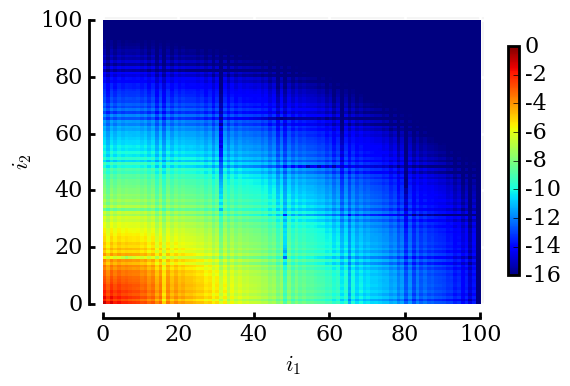

In [4]:
coeffplot2D(coefficients, index_set, '$i_1$', '$i_2$', filename='Tensor_grid.eps')

Now, let us try to obtain the same result using SPAM. This can be easily done in Effective Quadratures. We start by declaring a sparse grid index set

In [5]:
sparse = IndexSet('Sparse grid', level=7, growth_rule='exponential', dimension=2)

//anaconda/lib/python2.7/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)


And then proceed to compute the coefficients via the SPAM method. 

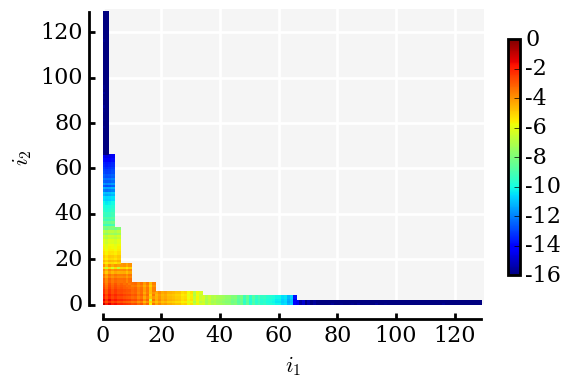

In [6]:
spam = Polynomial([x1,x2], sparse)
coefficients, index_set, pts = spam.getPolynomialCoefficients(function)
coeffplot2D(coefficients, index_set, '$i_1$', '$i_2$', filename='Sparse_grid.eps')

Note that a level 7 sparse grid with an exponential growth rule has a maximum univariate order of 129. And with that we are done! Do have a look at the code (and reference [1]) to understand how the SPAM method works. 

<h2> References </h2>

[1] Constantine, Paul G., Michael S. Eldred, and Eric T. Phipps. "Sparse pseudospectral approximation method." Computer Methods in Applied Mechanics and Engineering 229 (2012): 1-12.